In [ ]:
import imageio.image_properties_auxiliarydata as imgaux

In [2]:
img_aux_properties = imgaux.get_imagesource_properties_data_from_filepath(
    'IMG_0737.HEIC',
    imgaux.kCGImageAuxiliaryDataTypeHDRGainMap); #print(img_aux_properties)

img = img_aux_properties['image']
gain = img_aux_properties['auxiliary_data']

In [3]:
print(gain)

[[5 5 5 ... 0 0 0]
 [5 5 5 ... 0 0 0]
 [6 6 5 ... 0 0 0]
 ...
 [3 3 3 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [3 3 3 ... 0 0 0]]


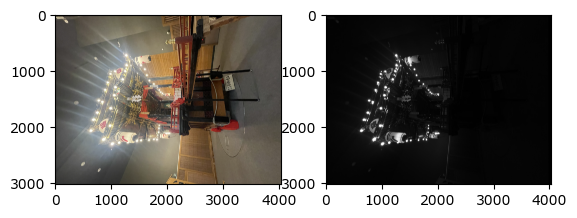

In [4]:
from matplotlib import pylab as plt
import numpy as np
import cv2
#from skimage.transform import resize

gain = cv2.resize(gain, dsize=(img.shape[1], img.shape[0]))

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(gain, cmap='gray')

In [5]:
print(img_aux_properties['properties'])

{
    ColorModel = RGB;
    DPIHeight = 72;
    DPIWidth = 72;
    Depth = 8;
    Orientation = 6;
    PixelHeight = 3024;
    PixelWidth = 4032;
    PrimaryImage = 1;
    ProfileName = "Display P3";
    "{Exif}" =     {
        ApertureValue = "2.526068811662211";
        BrightnessValue = "0.3308623043711791";
        ColorSpace = 65535;
        CompositeImage = 2;
        DateTimeDigitized = "2023:02:18 11:14:15";
        DateTimeOriginal = "2023:02:18 11:14:15";
        DigitalZoomRatio = "1.027173913043478";
        ExifVersion =         (
            2,
            3,
            2
        );
        ExposureBiasValue = 0;
        ExposureMode = 0;
        ExposureProgram = 2;
        ExposureTime = "0.025";
        FNumber = "2.4";
        Flash = 16;
        FocalLenIn35mmFilm = 14;
        FocalLength = "1.54";
        ISOSpeedRatings =         (
            1000
        );
        LensMake = Apple;
        LensModel = "iPhone 12 Pro Max back triple camera 1.54mm f/2.4";
     

In [14]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

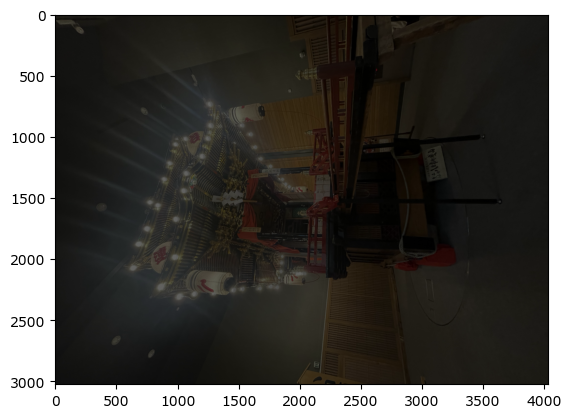

In [15]:
ycbcr_img = rgb2ycbcr(img*0.3)
ycbcr_img[:,:,0] = ycbcr_img[:,:,0]*np.power(1.001,gain)
plt.imshow(ycbcr2rgb(ycbcr_img))

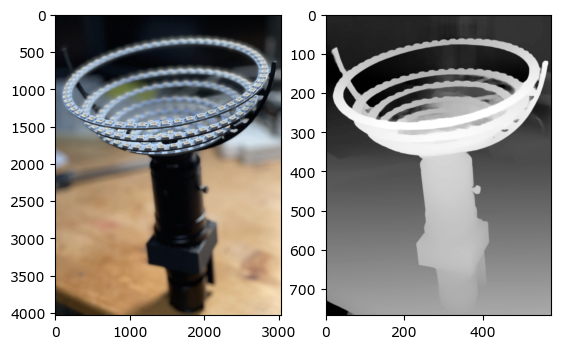

In [7]:
img_aux_properties = imgaux.get_imagesource_properties_data_from_filepath(
    'IMG_6039.heic',
    imgaux.kCGImageAuxiliaryDataTypeDisparity); #print(img_aux_properties)

img = img_aux_properties['image']
disparity = img_aux_properties['auxiliary_data']

from matplotlib import pylab as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img, cmap='gray')
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(disparity, cmap='gray')

In [8]:
print(img_aux_properties['properties'])

{
    ColorModel = RGB;
    DPIHeight = 72;
    DPIWidth = 72;
    Depth = 8;
    Orientation = 1;
    PixelHeight = 4032;
    PixelWidth = 3024;
    PrimaryImage = 1;
    ProfileName = "Display P3";
    "{Exif}" =     {
        ApertureValue = "2.275007047691421";
        BrightnessValue = "3.145296167247387";
        ColorSpace = 65535;
        ComponentsConfiguration =         (
            1,
            2,
            3,
            0
        );
        CompositeImage = 2;
        CustomRendered = 8;
        DateTimeDigitized = "2021:05:17 21:36:52";
        DateTimeOriginal = "2021:05:17 21:36:52";
        ExifVersion =         (
            2,
            3,
            2
        );
        ExposureBiasValue = 0;
        ExposureMode = 0;
        ExposureProgram = 2;
        ExposureTime = "0.01";
        FNumber = "2.2";
        Flash = 24;
        FlashPixVersion =         (
            1,
            0
        );
        FocalLenIn35mmFilm = 64;
        FocalLength = "7.5";
 